# Transfer learning with GNN

In [1]:
import keras as ks
import numpy as np

In [2]:
from kgcnn.literature.NMPN import make_model

In [3]:
model_config= {
    'name': "NMPN",
    'inputs': [
        {'shape': (None, 41), 'name': "node_attributes", 'dtype': 'float32'},
        {'shape': (None, 11), 'name': "edge_attributes", 'dtype': 'float32'},
        {'shape': (None, 2), 'name': "edge_indices", 'dtype': 'int64'},
        {"shape": (), "name": "total_nodes", "dtype": "int64"},
        {"shape": (), "name": "total_edges", "dtype": "int64"}
    ],
    "cast_disjoint_kwargs": {},
    "input_node_embedding": {"input_dim": 95, "output_dim": 128},
    "input_edge_embedding": {"input_dim": 95, "output_dim": 128},
    'input_embedding': None,
    'gauss_args': {"bins": 20, "distance": 4, "offset": 0.0, "sigma": 0.4},
    'set2set_args': {'channels': 64, 'T': 3, "pooling_method": "sum", "init_qstar": "0"},
    'pooling_args': {'pooling_method': "scatter_sum"},
    'edge_mlp': {'use_bias': True, 'activation': 'swish', "units": [64, 64]},
    'use_set2set': True, 'depth': 3, 'node_dim': 128,
    "geometric_edge": False, "make_distance": False, "expand_distance": False,
    'verbose': 10,
    'output_embedding': 'graph',
    'output_mlp': {"use_bias": [True, True, False], "units": [64, 32, 1],
                   "activation": ['swish', 'swish', 'linear']}
}

### Pretraining on ESOL

In [4]:
%%capture
from kgcnn.data.datasets.ESOLDataset import ESOLDataset
dataset = ESOLDataset()
dataset.clean(model_config["inputs"])
dataset.map_list(method="count_nodes_and_edges");

INFO:kgcnn.data.download:Checking and possibly downloading dataset with name ESOL
INFO:kgcnn.data.download:Dataset directory located at C:\Users\patri\.kgcnn\datasets
INFO:kgcnn.data.download:Dataset directory found. Done.
INFO:kgcnn.data.download:Dataset found. Done.
INFO:kgcnn.data.ESOL:Found SDF C:\Users\patri\.kgcnn\datasets\ESOL\delaney-processed.sdf of pre-computed structures.
INFO:kgcnn.data.ESOL:Read molecules from mol-file.
INFO:kgcnn.data.ESOL: ... process molecules 0 from 1128
INFO:kgcnn.molecule.encoder:OneHotEncoder Symbol found ['O', 'C', 'N', 'S', 'Cl', 'P', 'F', 'I', 'Br']
INFO:kgcnn.molecule.encoder:OneHotEncoder Hybridization found [rdkit.Chem.rdchem.HybridizationType.SP3, rdkit.Chem.rdchem.HybridizationType.SP, rdkit.Chem.rdchem.HybridizationType.SP2]
INFO:kgcnn.molecule.encoder:OneHotEncoder TotalDegree found [2, 4, 1, 3]
INFO:kgcnn.molecule.encoder:OneHotEncoder TotalNumHs found [1, 2, 0, 3, 4]
INFO:kgcnn.molecule.encoder:OneHotEncoder CIPCode found [None, 'S', 'R'

In [5]:
model_pre_trained = make_model(**model_config)

INFO:kgcnn.models.utils:Updated model kwargs: '{'name': 'NMPN', 'inputs': [{'shape': (None, 41), 'name': 'node_attributes', 'dtype': 'float32'}, {'shape': (None, 11), 'name': 'edge_attributes', 'dtype': 'float32'}, {'shape': (None, 2), 'name': 'edge_indices', 'dtype': 'int64'}, {'shape': (), 'name': 'total_nodes', 'dtype': 'int64'}, {'shape': (), 'name': 'total_edges', 'dtype': 'int64'}], 'input_tensor_type': 'padded', 'cast_disjoint_kwargs': {}, 'input_embedding': None, 'input_node_embedding': {'input_dim': 95, 'output_dim': 128}, 'input_edge_embedding': {'input_dim': 95, 'output_dim': 128}, 'geometric_edge': False, 'make_distance': False, 'expand_distance': False, 'gauss_args': {'bins': 20, 'distance': 4, 'offset': 0.0, 'sigma': 0.4}, 'set2set_args': {'channels': 64, 'T': 3, 'pooling_method': 'sum', 'init_qstar': '0'}, 'pooling_args': {'pooling_method': 'scatter_sum'}, 'edge_mlp': {'use_bias': True, 'activation': 'swish', 'units': [64, 64]}, 'use_set2set': True, 'depth': 3, 'node_dim

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Model: "NMPN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ node_attributes (InputLayer)  │ (None, None, 41)          │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ edge_indices (InputLayer)     │ (None, None, 2)           │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ total_nodes (InputLayer)      │ (None)                    │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ total_edges (InputLayer)      │ (None)                    │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ edge_attributes (InputLayer)  │ (None, None, 11)          │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ cast_batched_indices_to_disj… │ [(None, 41), (2, None),   │               0 │ node_attributes[0][0],     │
│ (CastBatchedIndicesToDisjoin… │ (None), (None), (None),   │                 │ edge_indices[0][0],        │
│                               │ (None), (None), (None)]   │                 │ total_nodes[0][0],         │
│                               │                           │                 │ total_edges[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ cast_batched_attributes_to_d… │ [(None, 11), (None),      │               0 │ edge_attributes[0][0],     │
│ (CastBatchedAttributesToDisj… │ (None), (None)]           │                 │ total_edges[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 128)               │           5,376 │ cast_batched_indices_to_d… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mlp (MLP)                     │ (None, 64)                │           4,928 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mlp_1 (MLP)                   │ (None, 64)                │           4,928 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ trafo_edge_net_messages       │ (None, 128, 128)          │       1,064,960 │ mlp[0][0]                  │
│ (TrafoEdgeNetMessages)        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gather_nodes_outgoing         │ (None, 128)               │               0 │ dense[0][0],               │
│ (GatherNodesOutgoing)         │                           │                 │ cast_batched_indices_to_d… │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,364,032 (9.02 MB)

 Trainable params: 2,364,032 (9.02 MB)

 Non-trainable params: 0 (0.00 B)

 Compiled with jit: False


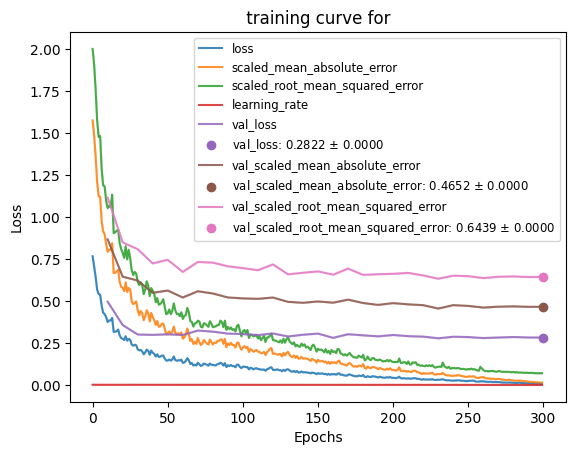

In [6]:
import time
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from kgcnn.training.scheduler import LinearLearningRateScheduler
from kgcnn.utils.plots import plot_train_test_loss, plot_predict_true
from kgcnn.data.transform.scaler.standard import StandardLabelScaler
from kgcnn.metrics.metrics import ScaledMeanAbsoluteError, ScaledRootMeanSquaredError

indices_train, indices_test = train_test_split(np.arange(len(dataset)), test_size=0.2)
dataset_train, dataset_test =  dataset[indices_train], dataset[indices_test]

y_train = np.expand_dims(dataset_train.get("graph_labels"), axis=-1)
x_train = dataset_train.tensor(model_config["inputs"])
y_test = np.expand_dims(dataset_test.get("graph_labels"), axis=-1)
x_test = dataset_test.tensor(model_config["inputs"])
scaler = StandardLabelScaler(with_std=True,with_mean=True, copy=True)
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

scaler_scale = scaler.get_scaling()
mae_metric = ScaledMeanAbsoluteError(scaler_scale.shape, name="scaled_mean_absolute_error")
rms_metric = ScaledRootMeanSquaredError(scaler_scale.shape, name="scaled_root_mean_squared_error")
if scaler.scale_ is not None:
    mae_metric.set_scale(scaler_scale)
    rms_metric.set_scale(scaler_scale)
metrics = [mae_metric, rms_metric]

# Compile model with optimizer and loss
model_pre_trained.compile(loss="mean_absolute_error", metrics=metrics, optimizer=Adam(learning_rate=1e-03))

# Build model with reasonable data.
model_pre_trained.predict(x_test)
model_pre_trained._compile_metrics.build(y_test, y_test)
model_pre_trained._compile_loss.build(y_test, y_test)

# Model summary
model_pre_trained.summary()
print(" Compiled with jit: %s" % model_pre_trained._jit_compile)  # noqa

# Start and time training
hist = model_pre_trained.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=32, 
    epochs=300, 
    validation_freq=10, 
    # Change to verbose = 2 to see progress
    verbose=0,
    callbacks= [LinearLearningRateScheduler(learning_rate_start=0.001, learning_rate_stop=1e-05, epo_min=100, epo=300)]
)
plot_train_test_loss([hist]);

## Transfer-learning and fine-tuning to FreeSolv

In [7]:
%%capture
from kgcnn.data.datasets.FreeSolvDataset import FreeSolvDataset
dataset = FreeSolvDataset()
dataset.clean(model_config["inputs"])
dataset.map_list(method="count_nodes_and_edges");

INFO:kgcnn.data.download:Checking and possibly downloading dataset with name FreeSolv
INFO:kgcnn.data.download:Dataset directory located at C:\Users\patri\.kgcnn\datasets
INFO:kgcnn.data.download:Dataset directory found. Done.
INFO:kgcnn.data.download:Dataset found. Done.
INFO:kgcnn.data.FreeSolv:Found SDF C:\Users\patri\.kgcnn\datasets\FreeSolv\SAMPL.sdf of pre-computed structures.
INFO:kgcnn.data.FreeSolv:Read molecules from mol-file.
INFO:kgcnn.data.FreeSolv: ... process molecules 0 from 642
INFO:kgcnn.molecule.encoder:OneHotEncoder Symbol found ['O', 'C', 'N', 'S', 'Cl', 'P', 'F', 'I', 'Br']
INFO:kgcnn.molecule.encoder:OneHotEncoder Hybridization found [rdkit.Chem.rdchem.HybridizationType.SP3, rdkit.Chem.rdchem.HybridizationType.SP, rdkit.Chem.rdchem.HybridizationType.SP2]
INFO:kgcnn.molecule.encoder:OneHotEncoder TotalDegree found [2, 4, 1, 3]
INFO:kgcnn.molecule.encoder:OneHotEncoder TotalNumHs found [1, 2, 0, 3, 4]
INFO:kgcnn.molecule.encoder:OneHotEncoder CIPCode found [None, '

make new model.

In [8]:
model = make_model(**model_config)

INFO:kgcnn.models.utils:Updated model kwargs: '{'name': 'NMPN', 'inputs': [{'shape': (None, 41), 'name': 'node_attributes', 'dtype': 'float32'}, {'shape': (None, 11), 'name': 'edge_attributes', 'dtype': 'float32'}, {'shape': (None, 2), 'name': 'edge_indices', 'dtype': 'int64'}, {'shape': (), 'name': 'total_nodes', 'dtype': 'int64'}, {'shape': (), 'name': 'total_edges', 'dtype': 'int64'}], 'input_tensor_type': 'padded', 'cast_disjoint_kwargs': {}, 'input_embedding': None, 'input_node_embedding': {'input_dim': 95, 'output_dim': 128}, 'input_edge_embedding': {'input_dim': 95, 'output_dim': 128}, 'geometric_edge': False, 'make_distance': False, 'expand_distance': False, 'gauss_args': {'bins': 20, 'distance': 4, 'offset': 0.0, 'sigma': 0.4}, 'set2set_args': {'channels': 64, 'T': 3, 'pooling_method': 'sum', 'init_qstar': '0'}, 'pooling_args': {'pooling_method': 'scatter_sum'}, 'edge_mlp': {'use_bias': True, 'activation': 'swish', 'units': [64, 64]}, 'use_set2set': True, 'depth': 3, 'node_dim

transfer weights from pretrained model

In [9]:
model.set_weights(model_pre_trained.get_weights())

set all varaibles to non trainable

In [10]:
for layer in model.layers:
    for v in layer.variables:
        v.trainable = False

except the last output MLP

In [11]:
model.layers[-2]

<MLP name=mlp_5, built=True>

In [12]:
for v in model.layers[-2].variables:
    v.trainable = True

In [13]:
model.summary()

Model: "NMPN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ node_attributes (InputLayer)  │ (None, None, 41)          │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ edge_indices (InputLayer)     │ (None, None, 2)           │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ total_nodes (InputLayer)      │ (None)                    │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ total_edges (InputLayer)      │ (None)                    │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ edge_attributes (InputLayer)  │ (None, None, 11)          │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ cast_batched_indices_to_disj… │ [(None, 41), (2, None),   │               0 │ node_attributes[0][0],     │
│ (CastBatchedIndicesToDisjoin… │ (None), (None), (None),   │                 │ edge_indices[0][0],        │
│                               │ (None), (None), (None)]   │                 │ total_nodes[0][0],         │
│                               │                           │                 │ total_edges[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ cast_batched_attributes_to_d… │ [(None, 11), (None),      │               0 │ edge_attributes[0][0],     │
│ (CastBatchedAttributesToDisj… │ (None), (None)]           │                 │ total_edges[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 128)               │           5,376 │ cast_batched_indices_to_d… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mlp_3 (MLP)                   │ (None, 64)                │           4,928 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mlp_4 (MLP)                   │ (None, 64)                │           4,928 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ trafo_edge_net_messages_2     │ (None, 128, 128)          │       1,064,960 │ mlp_3[0][0]                │
│ (TrafoEdgeNetMessages)        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gather_nodes_outgoing_3       │ (None, 128)               │               0 │ dense_4[0][0],             │
│ (GatherNodesOutgoing)         │                           │                 │ cast_batched_indices_to_d… │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,364,032 (9.02 MB)

 Trainable params: 10,368 (40.50 KB)

 Non-trainable params: 2,353,664 (8.98 MB)

now train on new dataset with warm-up

In [14]:
from sklearn.model_selection import KFold
labels = np.expand_dims(dataset.get("graph_labels"), axis=-1)
kf = KFold(n_splits=5, random_state=42, shuffle=True)
train_test_indices = [
    [train_index, test_index] for train_index, test_index in kf.split(X=np.zeros((len(dataset), 1)), y=labels)]

In [15]:
from sklearn.model_selection import KFold
from kgcnn.training.scheduler import LinearWarmupLinearLearningRateScheduler

history_list, test_indices_list = [], []
model, hist, x_test, y_test, scaler, atoms_test = None, None, None, None, None, None
splits_done = 0
for i, (train_index, test_index) in enumerate(train_test_indices):
    print("Running training on fold: %s" % i)

    # Make the model for current split using model kwargs from hyperparameter.
    # They are always updated on top of the models default kwargs.
    model = make_model(**model_config)
    model.set_weights(model_pre_trained.get_weights())
    for layer in model.layers:
        for v in layer.variables:
            v.trainable = False
    for v in model.layers[-2].variables:
        v.trainable = True
    
    dataset_train, dataset_test = dataset[train_index], dataset[test_index]
    x_train, y_train = dataset_train.tensor(model_config["inputs"]), labels[train_index]
    x_test, y_test = dataset_test.tensor(model_config["inputs"]), labels[test_index]

    scaler = StandardLabelScaler(with_std=True,with_mean=True, copy=True)
    scaler.fit(y_train)
    y_train = scaler.transform(y_train)
    y_test = scaler.transform(y_test)

    # If scaler was used we add rescaled standard metrics to compile.
    scaler_scale = scaler.get_scaling()
    mae_metric = ScaledMeanAbsoluteError(scaler_scale.shape, name="scaled_mean_absolute_error")
    rms_metric = ScaledRootMeanSquaredError(scaler_scale.shape, name="scaled_root_mean_squared_error")
    if scaler.scale_ is not None:
        mae_metric.set_scale(scaler_scale)
        rms_metric.set_scale(scaler_scale)
    metrics = [mae_metric, rms_metric]

    # Compile model with optimizer and loss
    model.compile(loss="mean_absolute_error", metrics=metrics, optimizer=Adam(learning_rate=1e-03))

    # Build model with reasonable data.
    model.predict(x_test)
    model._compile_metrics.build(y_test, y_test)
    model._compile_loss.build(y_test, y_test)
    print(model.summary())

    # Start and time training
    hist = model.fit(x_train, y_train,
                     validation_data=(x_test, y_test),
                     batch_size=32, 
                     epochs=300, 
                     validation_freq=10, 
                     # Change to verbose = 2 to see progress
                     verbose=0,
                     callbacks= [
                         LinearWarmupLinearLearningRateScheduler(
                             learning_rate_start=0.001, learning_rate_stop=1e-05, epo=300, epo_warmup=5, 
                             lr_start=0.001, steps_per_epoch=16, verbose=0)
                     ])

    # Get loss from history
    history_list.append(hist)
    test_indices_list.append([train_index, test_index])
    splits_done = splits_done + 1

INFO:kgcnn.models.utils:Updated model kwargs: '{'name': 'NMPN', 'inputs': [{'shape': (None, 41), 'name': 'node_attributes', 'dtype': 'float32'}, {'shape': (None, 11), 'name': 'edge_attributes', 'dtype': 'float32'}, {'shape': (None, 2), 'name': 'edge_indices', 'dtype': 'int64'}, {'shape': (), 'name': 'total_nodes', 'dtype': 'int64'}, {'shape': (), 'name': 'total_edges', 'dtype': 'int64'}], 'input_tensor_type': 'padded', 'cast_disjoint_kwargs': {}, 'input_embedding': None, 'input_node_embedding': {'input_dim': 95, 'output_dim': 128}, 'input_edge_embedding': {'input_dim': 95, 'output_dim': 128}, 'geometric_edge': False, 'make_distance': False, 'expand_distance': False, 'gauss_args': {'bins': 20, 'distance': 4, 'offset': 0.0, 'sigma': 0.4}, 'set2set_args': {'channels': 64, 'T': 3, 'pooling_method': 'sum', 'init_qstar': '0'}, 'pooling_args': {'pooling_method': 'scatter_sum'}, 'edge_mlp': {'use_bias': True, 'activation': 'swish', 'units': [64, 64]}, 'use_set2set': True, 'depth': 3, 'node_dim

Running training on fold: 0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Model: "NMPN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ node_attributes (InputLayer)  │ (None, None, 41)          │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ edge_indices (InputLayer)     │ (None, None, 2)           │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ total_nodes (InputLayer)      │ (None)                    │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ total_edges (InputLayer)      │ (None)                    │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ edge_attributes (InputLayer)  │ (None, None, 11)          │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ cast_batched_indices_to_disj… │ [(None, 41), (2, None),   │               0 │ node_attributes[0][0],     │
│ (CastBatchedIndicesToDisjoin… │ (None), (None), (None),   │                 │ edge_indices[0][0],        │
│                               │ (None), (None), (None)]   │                 │ total_nodes[0][0],         │
│                               │                           │                 │ total_edges[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ cast_batched_attributes_to_d… │ [(None, 11), (None),      │               0 │ edge_attributes[0][0],     │
│ (CastBatchedAttributesToDisj… │ (None), (None)]           │                 │ total_edges[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 128)               │           5,376 │ cast_batched_indices_to_d… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mlp_6 (MLP)                   │ (None, 64)                │           4,928 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mlp_7 (MLP)                   │ (None, 64)                │           4,928 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ trafo_edge_net_messages_4     │ (None, 128, 128)          │       1,064,960 │ mlp_6[0][0]                │
│ (TrafoEdgeNetMessages)        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gather_nodes_outgoing_6       │ (None, 128)               │               0 │ dense_8[0][0],             │
│ (GatherNodesOutgoing)         │                           │                 │ cast_batched_indices_to_d… │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,364,032 (9.02 MB)

 Trainable params: 10,368 (40.50 KB)

 Non-trainable params: 2,353,664 (8.98 MB)

None


INFO:kgcnn.models.utils:Updated model kwargs: '{'name': 'NMPN', 'inputs': [{'shape': (None, 41), 'name': 'node_attributes', 'dtype': 'float32'}, {'shape': (None, 11), 'name': 'edge_attributes', 'dtype': 'float32'}, {'shape': (None, 2), 'name': 'edge_indices', 'dtype': 'int64'}, {'shape': (), 'name': 'total_nodes', 'dtype': 'int64'}, {'shape': (), 'name': 'total_edges', 'dtype': 'int64'}], 'input_tensor_type': 'padded', 'cast_disjoint_kwargs': {}, 'input_embedding': None, 'input_node_embedding': {'input_dim': 95, 'output_dim': 128}, 'input_edge_embedding': {'input_dim': 95, 'output_dim': 128}, 'geometric_edge': False, 'make_distance': False, 'expand_distance': False, 'gauss_args': {'bins': 20, 'distance': 4, 'offset': 0.0, 'sigma': 0.4}, 'set2set_args': {'channels': 64, 'T': 3, 'pooling_method': 'sum', 'init_qstar': '0'}, 'pooling_args': {'pooling_method': 'scatter_sum'}, 'edge_mlp': {'use_bias': True, 'activation': 'swish', 'units': [64, 64]}, 'use_set2set': True, 'depth': 3, 'node_dim

Running training on fold: 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Model: "NMPN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ node_attributes (InputLayer)  │ (None, None, 41)          │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ edge_indices (InputLayer)     │ (None, None, 2)           │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ total_nodes (InputLayer)      │ (None)                    │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ total_edges (InputLayer)      │ (None)                    │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ edge_attributes (InputLayer)  │ (None, None, 11)          │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ cast_batched_indices_to_disj… │ [(None, 41), (2, None),   │               0 │ node_attributes[0][0],     │
│ (CastBatchedIndicesToDisjoin… │ (None), (None), (None),   │                 │ edge_indices[0][0],        │
│                               │ (None), (None), (None)]   │                 │ total_nodes[0][0],         │
│                               │                           │                 │ total_edges[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ cast_batched_attributes_to_d… │ [(None, 11), (None),      │               0 │ edge_attributes[0][0],     │
│ (CastBatchedAttributesToDisj… │ (None), (None)]           │                 │ total_edges[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_12 (Dense)              │ (None, 128)               │           5,376 │ cast_batched_indices_to_d… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mlp_9 (MLP)                   │ (None, 64)                │           4,928 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mlp_10 (MLP)                  │ (None, 64)                │           4,928 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ trafo_edge_net_messages_6     │ (None, 128, 128)          │       1,064,960 │ mlp_9[0][0]                │
│ (TrafoEdgeNetMessages)        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gather_nodes_outgoing_9       │ (None, 128)               │               0 │ dense_12[0][0],            │
│ (GatherNodesOutgoing)         │                           │                 │ cast_batched_indices_to_d… │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,364,032 (9.02 MB)

 Trainable params: 10,368 (40.50 KB)

 Non-trainable params: 2,353,664 (8.98 MB)

None


INFO:kgcnn.models.utils:Updated model kwargs: '{'name': 'NMPN', 'inputs': [{'shape': (None, 41), 'name': 'node_attributes', 'dtype': 'float32'}, {'shape': (None, 11), 'name': 'edge_attributes', 'dtype': 'float32'}, {'shape': (None, 2), 'name': 'edge_indices', 'dtype': 'int64'}, {'shape': (), 'name': 'total_nodes', 'dtype': 'int64'}, {'shape': (), 'name': 'total_edges', 'dtype': 'int64'}], 'input_tensor_type': 'padded', 'cast_disjoint_kwargs': {}, 'input_embedding': None, 'input_node_embedding': {'input_dim': 95, 'output_dim': 128}, 'input_edge_embedding': {'input_dim': 95, 'output_dim': 128}, 'geometric_edge': False, 'make_distance': False, 'expand_distance': False, 'gauss_args': {'bins': 20, 'distance': 4, 'offset': 0.0, 'sigma': 0.4}, 'set2set_args': {'channels': 64, 'T': 3, 'pooling_method': 'sum', 'init_qstar': '0'}, 'pooling_args': {'pooling_method': 'scatter_sum'}, 'edge_mlp': {'use_bias': True, 'activation': 'swish', 'units': [64, 64]}, 'use_set2set': True, 'depth': 3, 'node_dim

Running training on fold: 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Model: "NMPN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ node_attributes (InputLayer)  │ (None, None, 41)          │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ edge_indices (InputLayer)     │ (None, None, 2)           │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ total_nodes (InputLayer)      │ (None)                    │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ total_edges (InputLayer)      │ (None)                    │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ edge_attributes (InputLayer)  │ (None, None, 11)          │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ cast_batched_indices_to_disj… │ [(None, 41), (2, None),   │               0 │ node_attributes[0][0],     │
│ (CastBatchedIndicesToDisjoin… │ (None), (None), (None),   │                 │ edge_indices[0][0],        │
│                               │ (None), (None), (None)]   │                 │ total_nodes[0][0],         │
│                               │                           │                 │ total_edges[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ cast_batched_attributes_to_d… │ [(None, 11), (None),      │               0 │ edge_attributes[0][0],     │
│ (CastBatchedAttributesToDisj… │ (None), (None)]           │                 │ total_edges[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_16 (Dense)              │ (None, 128)               │           5,376 │ cast_batched_indices_to_d… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mlp_12 (MLP)                  │ (None, 64)                │           4,928 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mlp_13 (MLP)                  │ (None, 64)                │           4,928 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ trafo_edge_net_messages_8     │ (None, 128, 128)          │       1,064,960 │ mlp_12[0][0]               │
│ (TrafoEdgeNetMessages)        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gather_nodes_outgoing_12      │ (None, 128)               │               0 │ dense_16[0][0],            │
│ (GatherNodesOutgoing)         │                           │                 │ cast_batched_indices_to_d… │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,364,032 (9.02 MB)

 Trainable params: 10,368 (40.50 KB)

 Non-trainable params: 2,353,664 (8.98 MB)

None


INFO:kgcnn.models.utils:Updated model kwargs: '{'name': 'NMPN', 'inputs': [{'shape': (None, 41), 'name': 'node_attributes', 'dtype': 'float32'}, {'shape': (None, 11), 'name': 'edge_attributes', 'dtype': 'float32'}, {'shape': (None, 2), 'name': 'edge_indices', 'dtype': 'int64'}, {'shape': (), 'name': 'total_nodes', 'dtype': 'int64'}, {'shape': (), 'name': 'total_edges', 'dtype': 'int64'}], 'input_tensor_type': 'padded', 'cast_disjoint_kwargs': {}, 'input_embedding': None, 'input_node_embedding': {'input_dim': 95, 'output_dim': 128}, 'input_edge_embedding': {'input_dim': 95, 'output_dim': 128}, 'geometric_edge': False, 'make_distance': False, 'expand_distance': False, 'gauss_args': {'bins': 20, 'distance': 4, 'offset': 0.0, 'sigma': 0.4}, 'set2set_args': {'channels': 64, 'T': 3, 'pooling_method': 'sum', 'init_qstar': '0'}, 'pooling_args': {'pooling_method': 'scatter_sum'}, 'edge_mlp': {'use_bias': True, 'activation': 'swish', 'units': [64, 64]}, 'use_set2set': True, 'depth': 3, 'node_dim

Running training on fold: 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Model: "NMPN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ node_attributes (InputLayer)  │ (None, None, 41)          │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ edge_indices (InputLayer)     │ (None, None, 2)           │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ total_nodes (InputLayer)      │ (None)                    │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ total_edges (InputLayer)      │ (None)                    │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ edge_attributes (InputLayer)  │ (None, None, 11)          │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ cast_batched_indices_to_disj… │ [(None, 41), (2, None),   │               0 │ node_attributes[0][0],     │
│ (CastBatchedIndicesToDisjoin… │ (None), (None), (None),   │                 │ edge_indices[0][0],        │
│                               │ (None), (None), (None)]   │                 │ total_nodes[0][0],         │
│                               │                           │                 │ total_edges[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ cast_batched_attributes_to_d… │ [(None, 11), (None),      │               0 │ edge_attributes[0][0],     │
│ (CastBatchedAttributesToDisj… │ (None), (None)]           │                 │ total_edges[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_20 (Dense)              │ (None, 128)               │           5,376 │ cast_batched_indices_to_d… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mlp_15 (MLP)                  │ (None, 64)                │           4,928 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mlp_16 (MLP)                  │ (None, 64)                │           4,928 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ trafo_edge_net_messages_10    │ (None, 128, 128)          │       1,064,960 │ mlp_15[0][0]               │
│ (TrafoEdgeNetMessages)        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gather_nodes_outgoing_15      │ (None, 128)               │               0 │ dense_20[0][0],            │
│ (GatherNodesOutgoing)         │                           │                 │ cast_batched_indices_to_d… │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,364,032 (9.02 MB)

 Trainable params: 10,368 (40.50 KB)

 Non-trainable params: 2,353,664 (8.98 MB)

None


INFO:kgcnn.models.utils:Updated model kwargs: '{'name': 'NMPN', 'inputs': [{'shape': (None, 41), 'name': 'node_attributes', 'dtype': 'float32'}, {'shape': (None, 11), 'name': 'edge_attributes', 'dtype': 'float32'}, {'shape': (None, 2), 'name': 'edge_indices', 'dtype': 'int64'}, {'shape': (), 'name': 'total_nodes', 'dtype': 'int64'}, {'shape': (), 'name': 'total_edges', 'dtype': 'int64'}], 'input_tensor_type': 'padded', 'cast_disjoint_kwargs': {}, 'input_embedding': None, 'input_node_embedding': {'input_dim': 95, 'output_dim': 128}, 'input_edge_embedding': {'input_dim': 95, 'output_dim': 128}, 'geometric_edge': False, 'make_distance': False, 'expand_distance': False, 'gauss_args': {'bins': 20, 'distance': 4, 'offset': 0.0, 'sigma': 0.4}, 'set2set_args': {'channels': 64, 'T': 3, 'pooling_method': 'sum', 'init_qstar': '0'}, 'pooling_args': {'pooling_method': 'scatter_sum'}, 'edge_mlp': {'use_bias': True, 'activation': 'swish', 'units': [64, 64]}, 'use_set2set': True, 'depth': 3, 'node_dim

Running training on fold: 4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Model: "NMPN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ node_attributes (InputLayer)  │ (None, None, 41)          │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ edge_indices (InputLayer)     │ (None, None, 2)           │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ total_nodes (InputLayer)      │ (None)                    │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ total_edges (InputLayer)      │ (None)                    │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ edge_attributes (InputLayer)  │ (None, None, 11)          │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ cast_batched_indices_to_disj… │ [(None, 41), (2, None),   │               0 │ node_attributes[0][0],     │
│ (CastBatchedIndicesToDisjoin… │ (None), (None), (None),   │                 │ edge_indices[0][0],        │
│                               │ (None), (None), (None)]   │                 │ total_nodes[0][0],         │
│                               │                           │                 │ total_edges[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ cast_batched_attributes_to_d… │ [(None, 11), (None),      │               0 │ edge_attributes[0][0],     │
│ (CastBatchedAttributesToDisj… │ (None), (None)]           │                 │ total_edges[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_24 (Dense)              │ (None, 128)               │           5,376 │ cast_batched_indices_to_d… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mlp_18 (MLP)                  │ (None, 64)                │           4,928 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mlp_19 (MLP)                  │ (None, 64)                │           4,928 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
│                               │                           │                 │ cast_batched_attributes_t… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ trafo_edge_net_messages_12    │ (None, 128, 128)          │       1,064,960 │ mlp_18[0][0]               │
│ (TrafoEdgeNetMessages)        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gather_nodes_outgoing_18      │ (None, 128)               │               0 │ dense_24[0][0],            │
│ (GatherNodesOutgoing)         │                           │                 │ cast_batched_indices_to_d… │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,364,032 (9.02 MB)

 Trainable params: 10,368 (40.50 KB)

 Non-trainable params: 2,353,664 (8.98 MB)

None


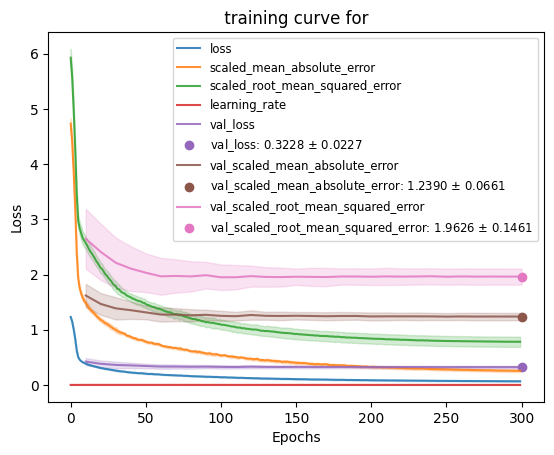

In [16]:
plot_train_test_loss(history_list);

check if weights changed. All but the output mlp should stay the same

In [17]:
w_original = model_pre_trained.get_weights()
w_new = model.get_weights()
test = [np.amax(np.abs(x-y)) for x,y in zip(w_original, w_new)]
print(test)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7717946, 0.17385386, 0.3142439, 0.13502005, 0.25949743]
